In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import pandas as pd

In [2]:
d1 = glob.glob('digit_data/isolated/36/1/*')
d2 = glob.glob('digit_data/isolated/36/2/*')
d3 = glob.glob('digit_data/isolated/36/3/*')

In [3]:
def load_mfcc(list_paths):
    X = []
    for i in list_paths:
        X.append(np.array(pd.read_csv(i, sep = " ", skiprows = [0], header = None))[:,1:])

    return np.array(X)

def combine(X):
    temp_X = []

    for i in X:
        for j in i:
            temp_X.append(j)

    return np.array(temp_X)

In [4]:
def plot_elbow(X, K=10):
    
    distortions = []
    for k in range(1,K):
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    # Plot the elbow
    plt.plot(range(1,K), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
def get_labels(X, K):
    clf = KMeans(n_clusters = K)
    clf.fit(X)

    # Gives the final cetnroids of each cluster
    centroids = clf.cluster_centers_

    # Label of each data-point
    return clf.labels_

In [5]:
# Load and structure data
X1 = load_mfcc(d1)
X2 = load_mfcc(d2)
X3 = load_mfcc(d3)

# Train Test data partition
X1_train,X1_test = train_test_split(X1, test_size=0.3, random_state=42)
X2_train,X2_test = train_test_split(X2, test_size=0.3, random_state=42)
X3_train,X3_test = train_test_split(X3, test_size=0.3, random_state=42)

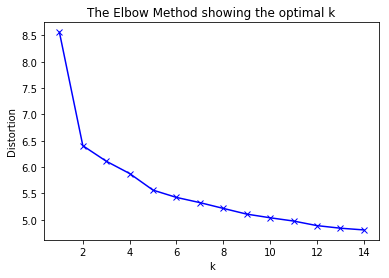

In [7]:
plot_elbow(np.vstack((combine(X1_train), combine(X2_train), combine(X3_train))), 15)

In [6]:
def build_train_data(label_data, before_combine_data):
    start = 0
    end = start
    temp_labels = []
    for i in before_combine_data:
        bound = i.shape[0]
        temp_labels.append(label_data[start:end+bound])
        start = end+bound
        end = start

    return np.array(temp_labels)   

In [7]:
def generate_out(X1, X2, X3, K):
    cX1 = combine(X1)
    cX2 = combine(X2)
    cX3 = combine(X3)    

    X = np.vstack((cX1, cX2, cX3))

    c_d = get_labels(X, K)

    c1 = c_d[0:cX1.shape[0]]
    c2 = c_d[cX1.shape[0]:cX1.shape[0]+cX2.shape[0]]
    c3 = c_d[cX1.shape[0]+cX2.shape[0]:]

    d1_labels = build_train_data(c1, X1)
    d2_labels = build_train_data(c2, X2)
    d3_labels = build_train_data(c3, X3)

    return (d1_labels, d2_labels, d3_labels)



In [9]:
def write_outfile(np_array, filename="np_array.out"):
    with open(filename, 'w') as f:
        for row in np_array:
            temp = ''
            for item in row:
                temp = temp+str(item)+' '
            f.write(temp+'\n')
    print("Dumped to "+filename)
        

In [10]:
t1,t2,t3 = generate_out(X1_train, X2_train, X3_train, 10)
write_outfile(t1,'d1_labels.out')
write_outfile(t2,'d2_labels.out')
write_outfile(t3,'d3_labels.out')

Dumped to d1_labels.out
Dumped to d2_labels.out
Dumped to d3_labels.out


In [11]:
t1,t2,t3 = generate_out(X1_test, X2_test, X3_test, 4)
write_outfile(t1,'d1_labels_test.out')
write_outfile(t2,'d2_labels_test.out')
write_outfile(t3,'d3_labels_test.out')

Dumped to d1_labels_test.out
Dumped to d2_labels_test.out
Dumped to d3_labels_test.out
